In [1]:
# with pip
%pip install pandas
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
# with import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('./statsfinal.csv')

In [26]:
data.head(5)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


In [27]:
print(set(len(date) for date in data['Date']))

{9, 10}


Question (1) Is there any trend in the sales of all four products during certain months?

In [28]:
months = [date[3:] for date in data_month['Date']]
data['Month'] = months
data.head(5)


,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Month
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,06-2010
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,06-2010
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,06-2010
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,06-2010
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,06-2010


In [31]:
data1 = pd.DataFrame(columns=data.columns[2:])
for month in data['Month'].unique():
    newRow = {'Month': month}
    for col in data.columns[2:-1]:
        if col[0] == 'Q':
           newRow[col] = np.median(data[data['Month'] == month][col]) 
        else:
            newRow[col] = np.mean(data[data['Month'] == month][col])
        # newRow[col] = np.sum(data_month[data_month['Month'] == month][col])
    data1.loc[len(data1)] = newRow

data1.head(10)



,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Month
0,5315.5,2188.0,2947.0,1137.5,15181.306111,13194.596667,14787.566667,7975.301111,06-2010
1,3935.0,1888.0,2607.0,1121.0,14593.350645,12130.465161,15519.383226,7729.380000,07-2010
2,2664.5,2360.5,3858.5,1152.5,10381.327333,13104.357333,18233.422000,8223.266667,08-2010
3,3807.0,2181.0,3085.0,1189.0,11759.268387,13531.809677,16033.409032,8177.420000,09-2010
4,4881.0,2035.5,3267.0,1163.0,13769.423333,13950.324667,16296.856000,7708.480667,10-2010
5,3100.0,2866.0,3475.0,1182.0,11254.624839,15669.412258,18129.725161,7522.150000,11-2010
6,5070.5,1886.0,3698.5,1015.0,13677.916000,13891.996667,19101.164000,7832.305000,12-2010
7,2032.0,2174.0,3283.0,1219.0,9125.305161,13251.009032,17383.163871,7898.890000,01-2011
8,2894.5,2619.5,3449.5,1196.5,10790.227143,15414.804286,17695.525714,8910.462857,02-2011
9,4281.0,1626.0,2651.0,1163.0,13371.264516,12747.899355,15736.008387,7642.670000,03-2011


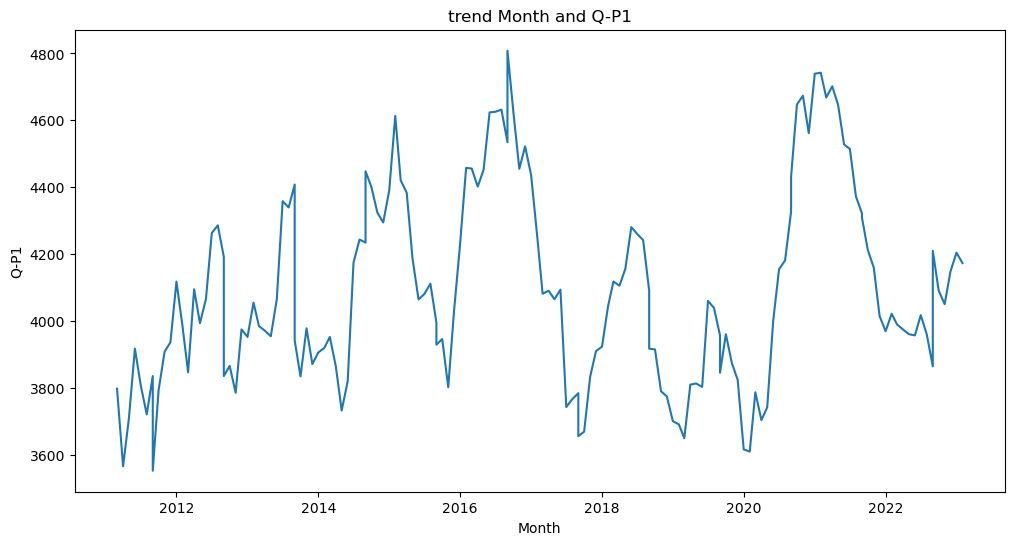

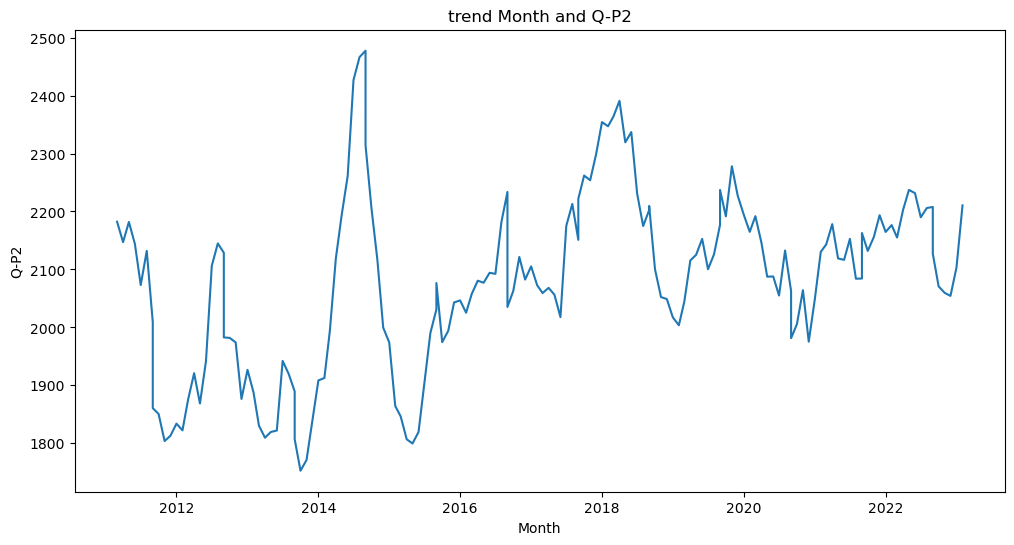

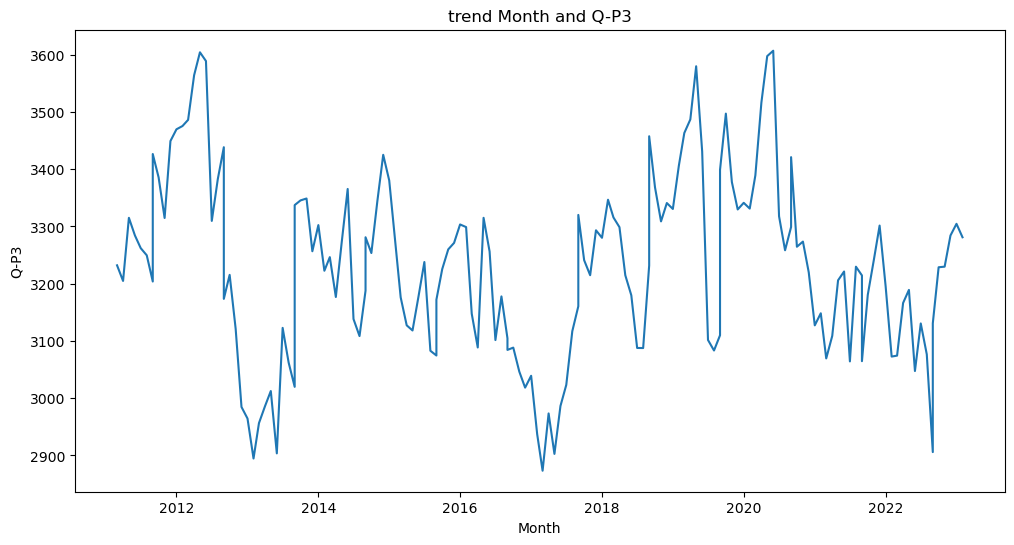

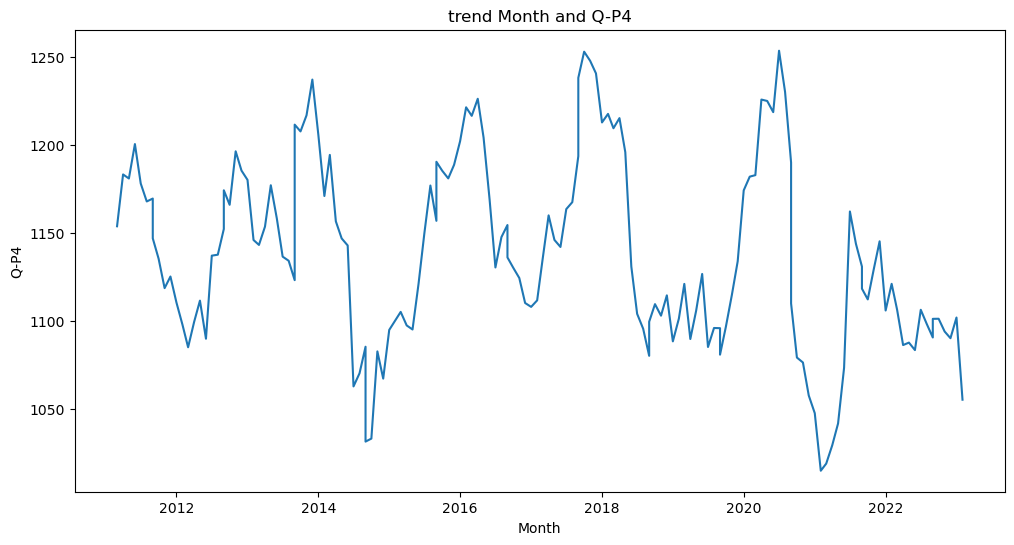

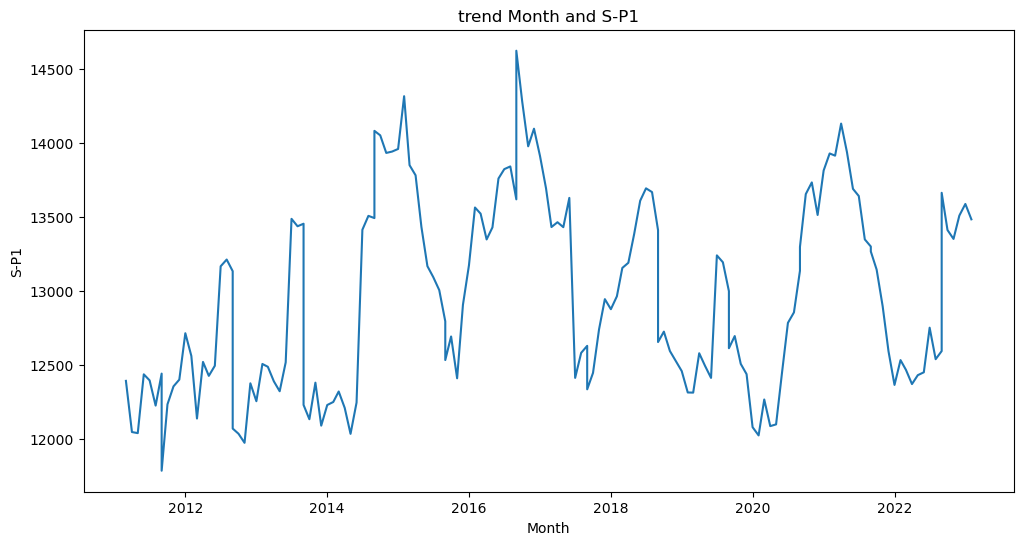

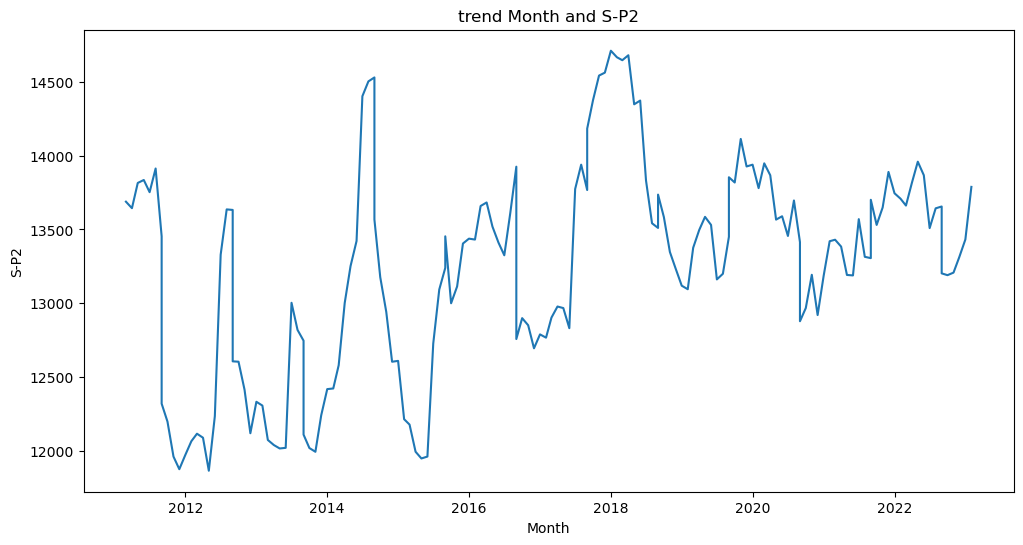

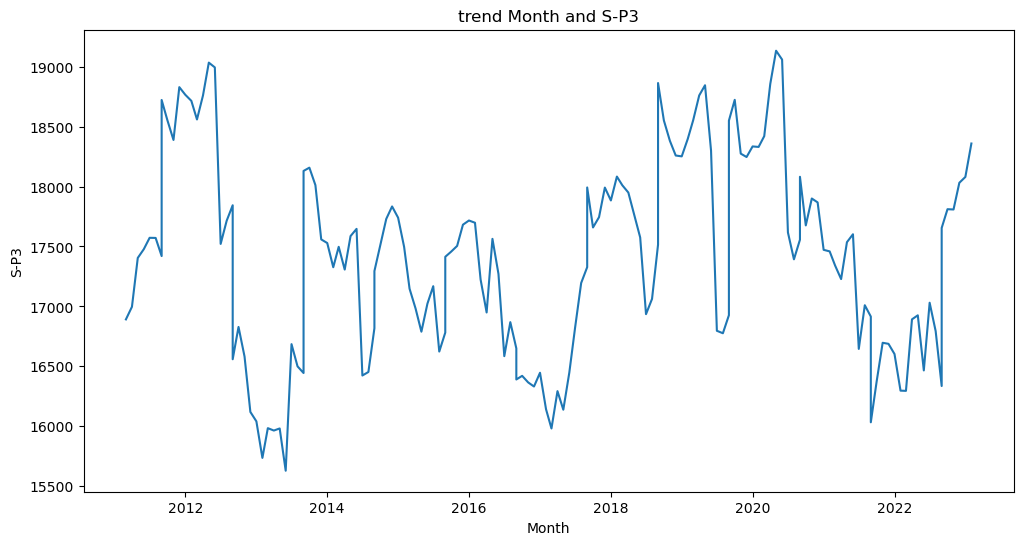

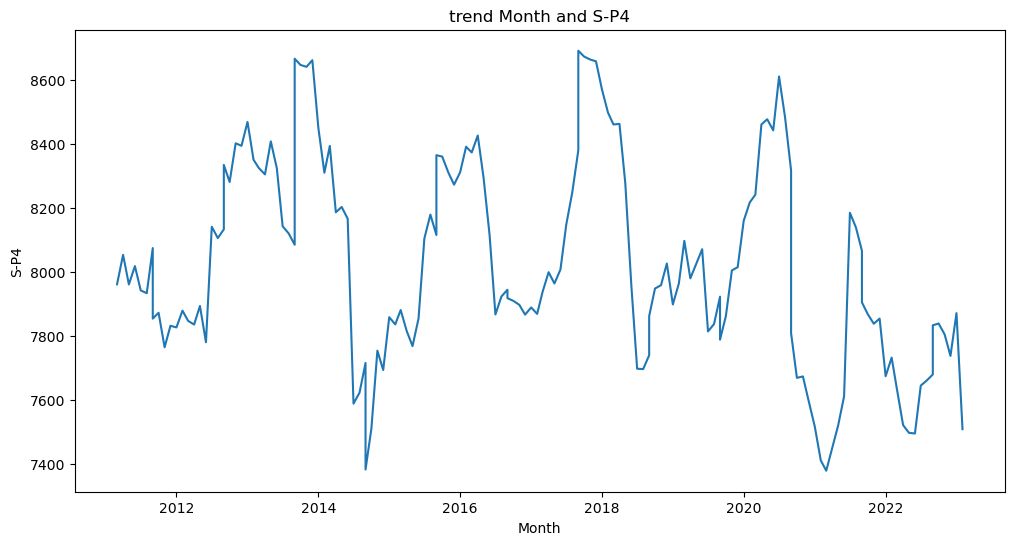

In [32]:
sample = data1
for col in data1.columns[:-1]:
    plt.figure(figsize=(12, 6))

    moving_average = sample[col].rolling(window=10).mean()
    plt.plot(pd.to_datetime(sample['Month'], format='%m-%Y', errors='coerce'), moving_average)
    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.title('trend Month and ' + col)

    # Show the plot
    plt.show()

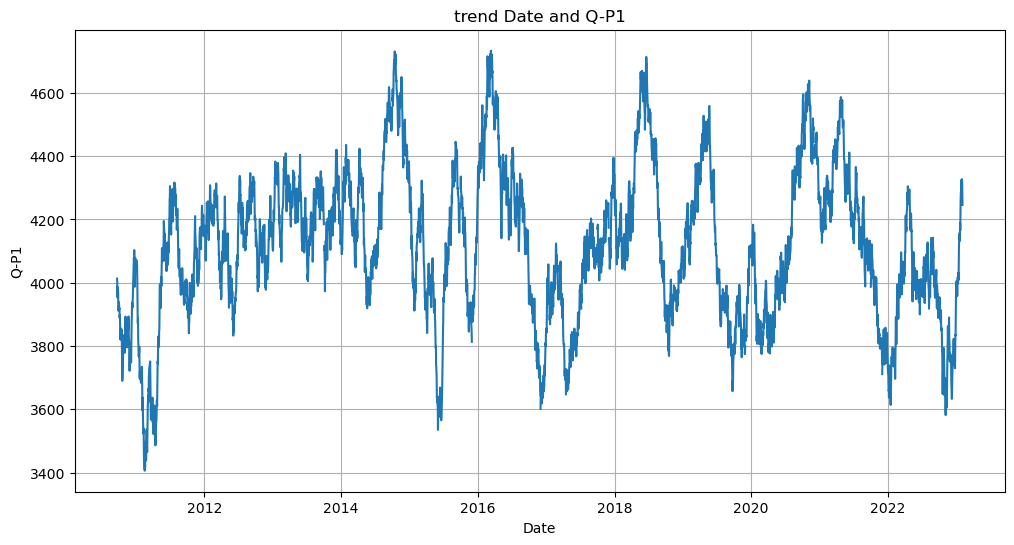

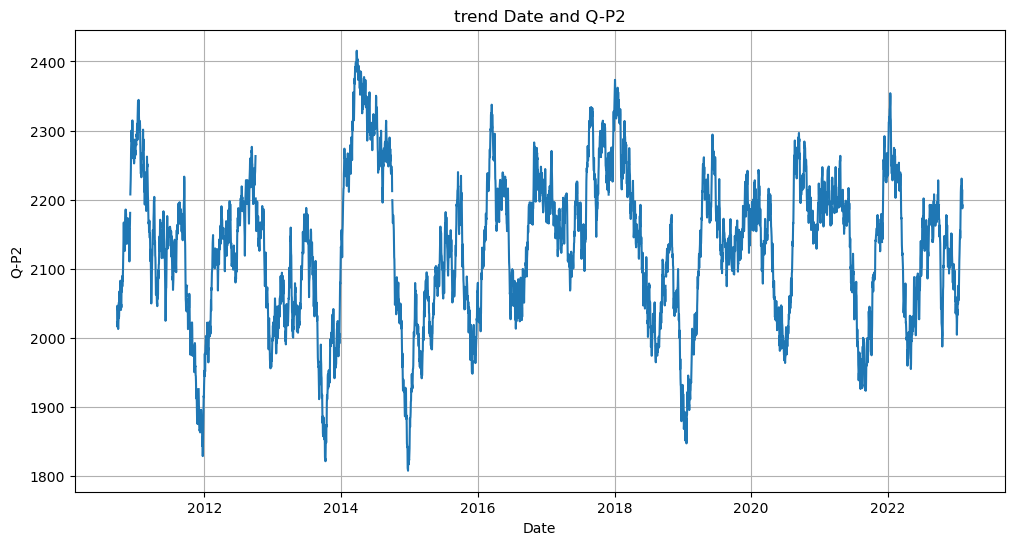

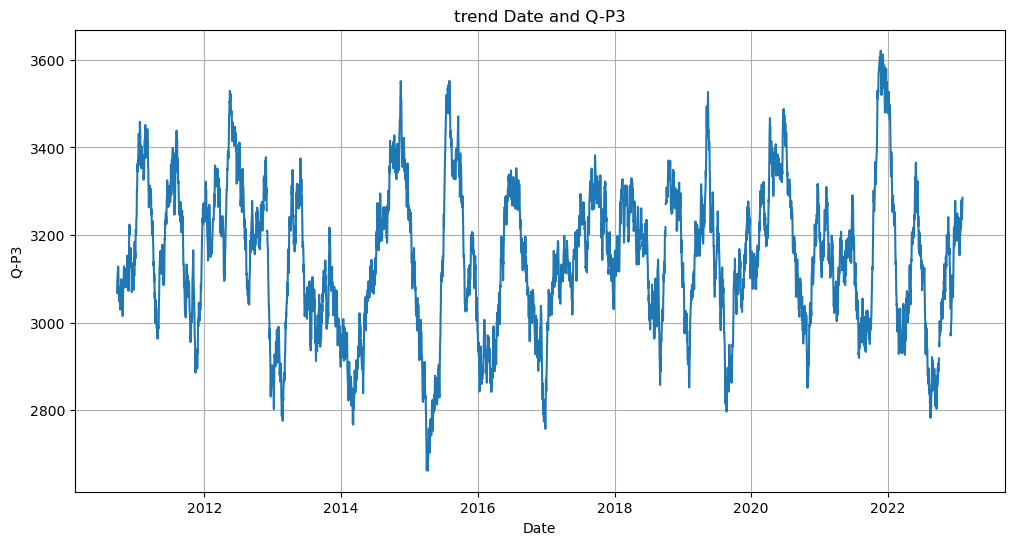

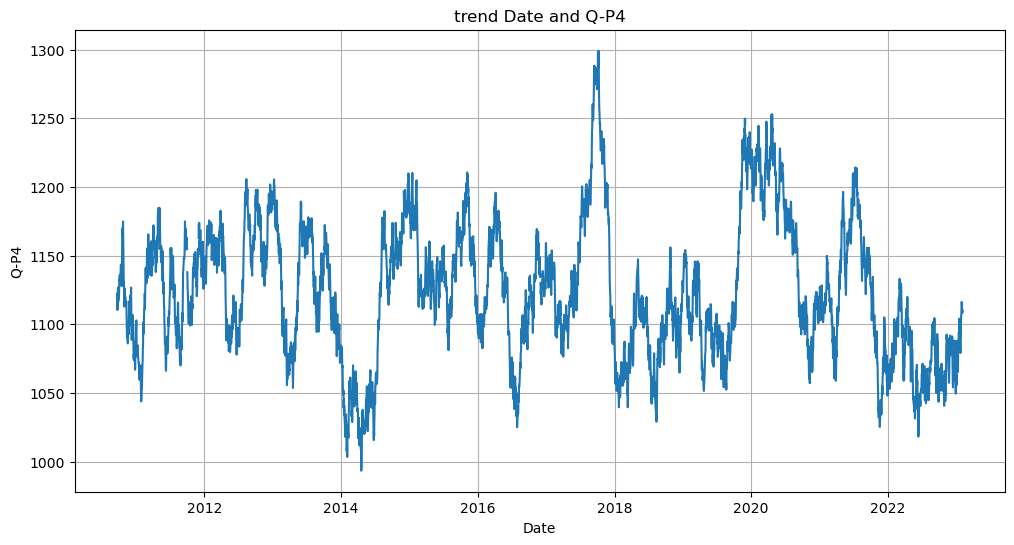

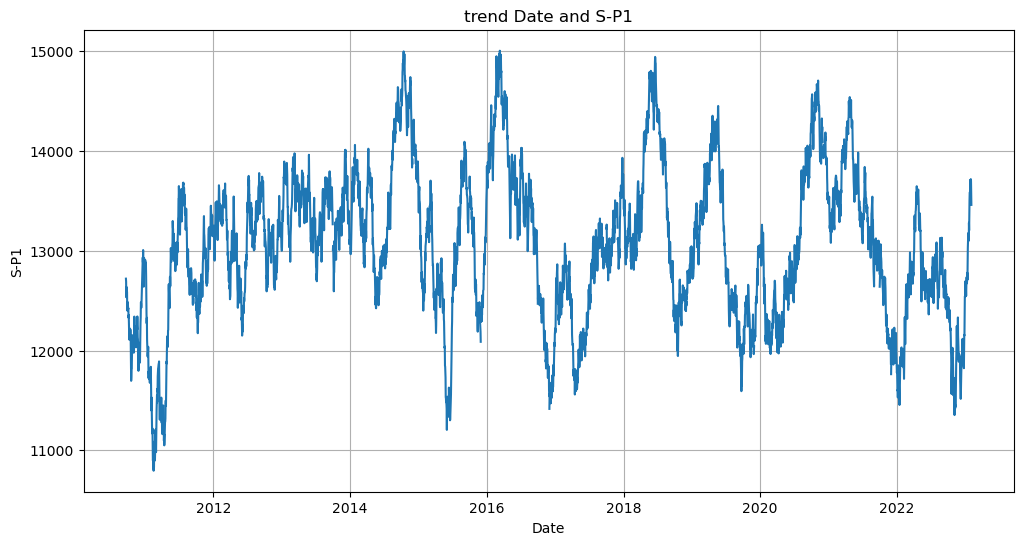

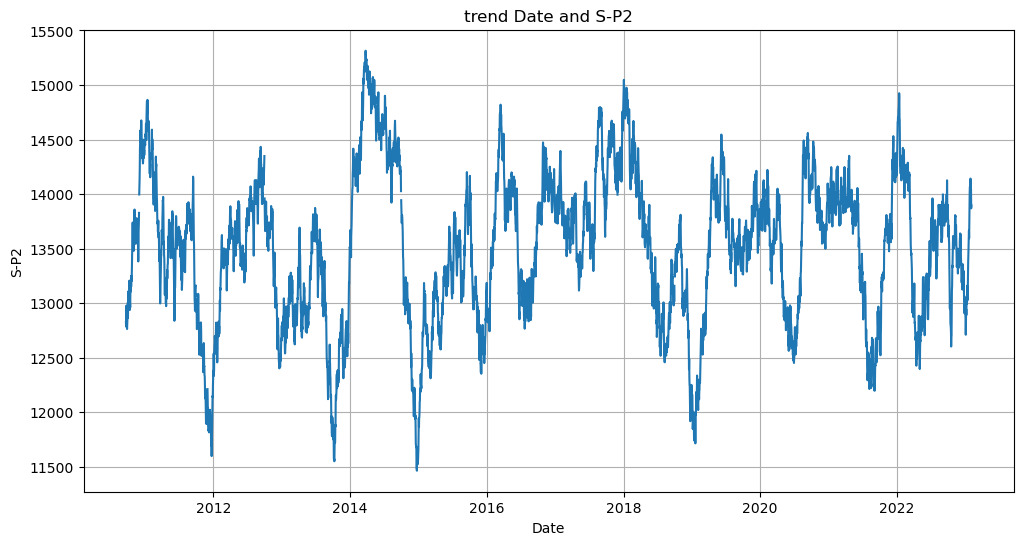

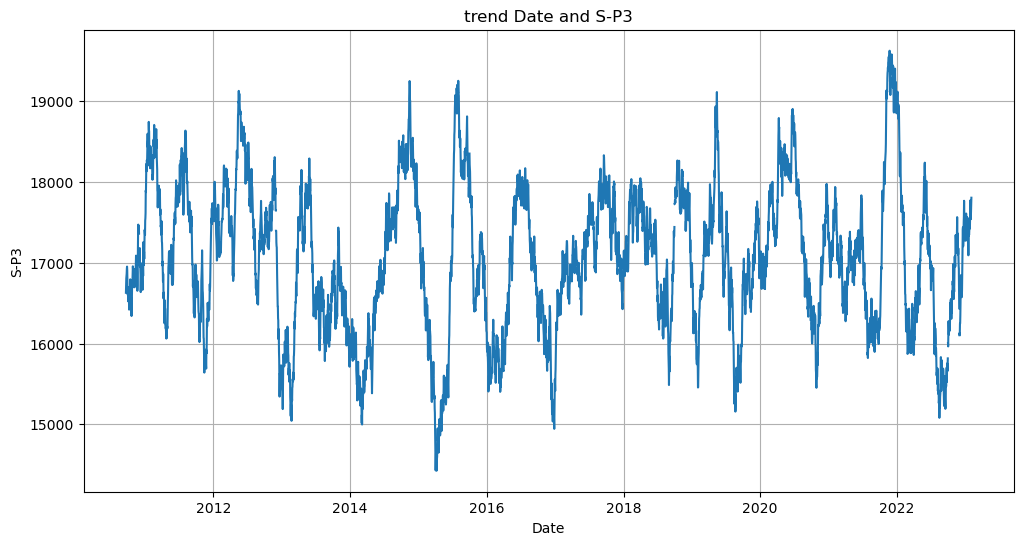

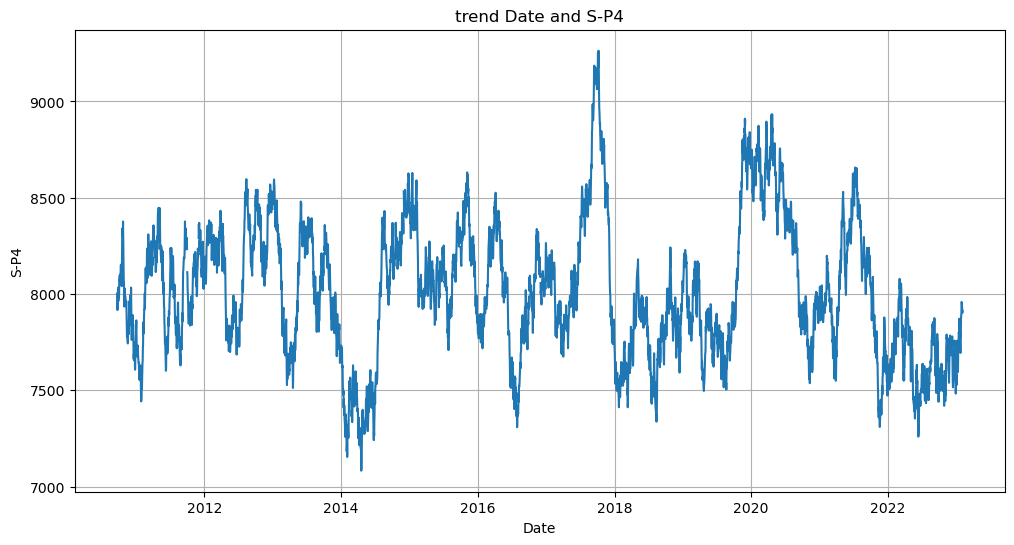

In [33]:
sample = data
for col in data.columns[2:-1]:
    # print(sample[col])
    # break
    plt.figure(figsize=(12, 6))
    moving_average = sample[col].rolling(window=100).mean()
    plt.plot(pd.to_datetime(sample['Date'], format='%d-%m-%Y', errors='coerce'), moving_average)
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title('trend Date and ' + col)
    plt.grid(True)
    # Show the plot
    plt.show()

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4', 'Month'],
      dtype='object')
Q-P1


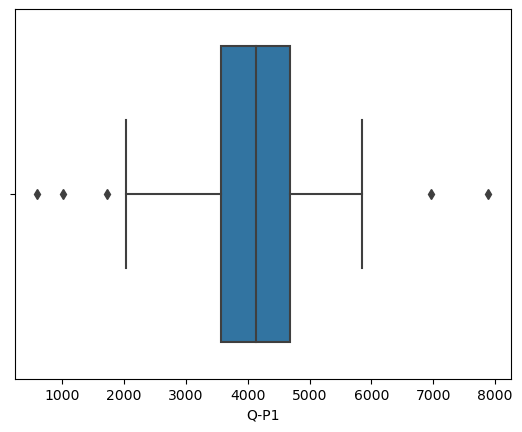

Q-P2


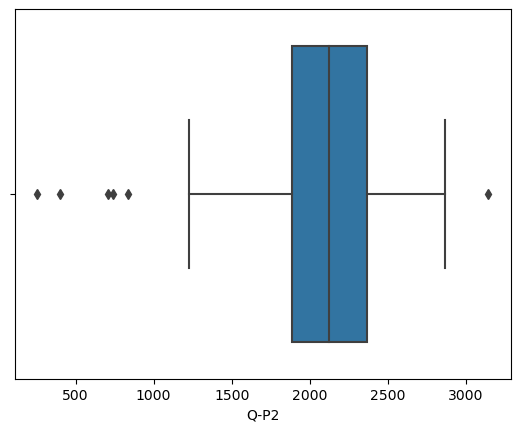

Q-P3


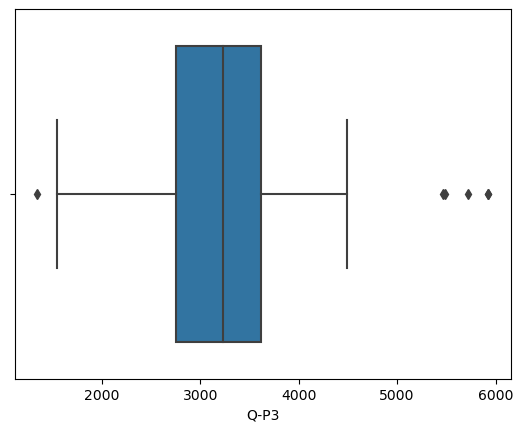

Q-P4


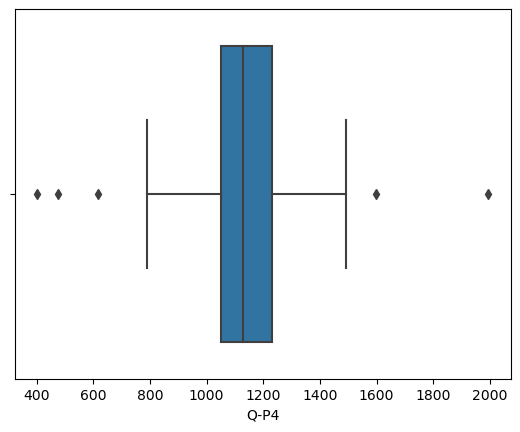

S-P1


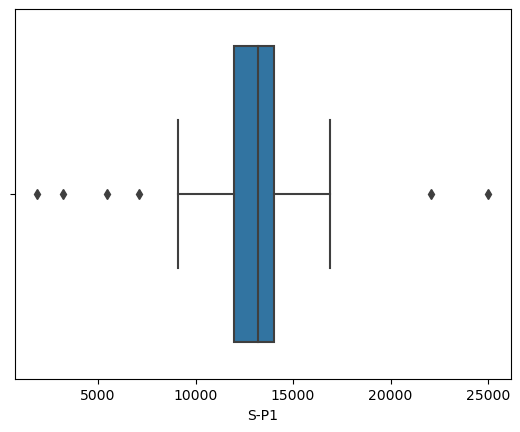

S-P2


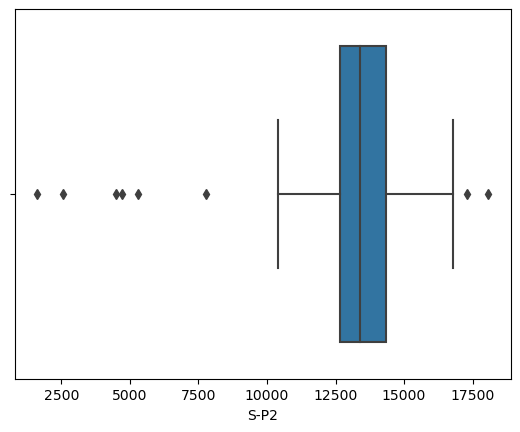

S-P3


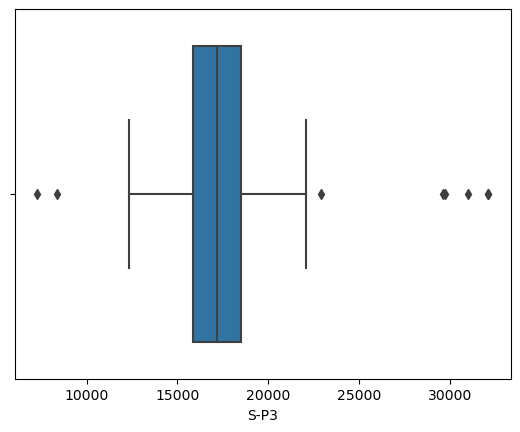

S-P4


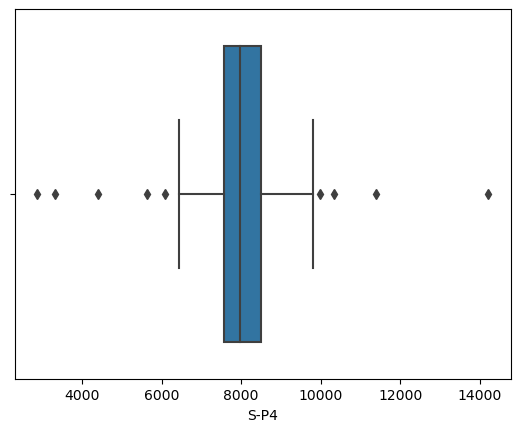

In [34]:
print(data.columns)
def boxPlotMonth(dataForPlot: pd.DataFrame):
    for col in data.columns[2:-1]:
        print(col)
        sns.boxplot(x=dataForPlot[col])
        plt.show()

boxPlotMonth(data1)

Qustion (2) Out of all four products , which product has seen the highest sales in all the given years?

In [35]:
years = [int(date[-4:]) for date in data['Date']]
data['Year'] = years
data.head(5)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Month,Year
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,06-2010,2010
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,06-2010,2010
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,06-2010,2010
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,06-2010,2010
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,06-2010,2010


In [54]:
data2 = pd.DataFrame(columns=data.columns[2:-2])
data2['Year'] = []
# data2.head()
for year in data['Year'].unique():
    newRow = {'Year': year}
    for col in data.columns[2:-2]:
        if col[0] == 'Q':
            newRow[col] = np.median(data[data['Year'] == year][col]) 
        else:
            newRow[col] = np.mean(data[data['Year'] == year][col])
        # newRow[col] = np.sum(data_year[data_year['Year'] == year][col])
    data2.loc[len(data2)] = newRow

data2

,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Year
0,3914.0,2164.0,3323.0,1130.0,12805.711791,13667.589055,16991.430348,7874.499701,2010
1,3867.0,2084.5,3280.5,1168.0,12502.628049,13092.657363,17285.883901,8076.527088,2011
2,4163.0,2044.0,3149.0,1163.0,13174.371543,13444.939339,17090.021488,8208.731680,2012
3,4225.5,2009.0,3021.5,1102.5,13351.439093,13142.018791,16619.060110,7940.822033,2013
4,4422.0,2286.5,3344.0,1090.5,13691.473846,13743.674341,17313.013681,7908.580330,2014
5,4175.0,2175.0,3035.5,1143.5,12925.561786,13376.076264,16559.827253,8094.724258,2015
6,4335.0,2168.0,3033.0,1155.0,13252.896722,13691.116474,16613.837906,8022.035675,2016
7,3922.5,2239.0,3216.5,1199.5,12799.441071,14088.089615,17371.814725,8207.726923,2017
8,4028.5,1971.5,3165.0,1071.0,13336.808324,13084.993626,17154.448901,7806.762363,2018
9,4028.5,2166.5,3129.5,1131.0,12911.854148,13679.298956,16904.175934,8039.368819,2019


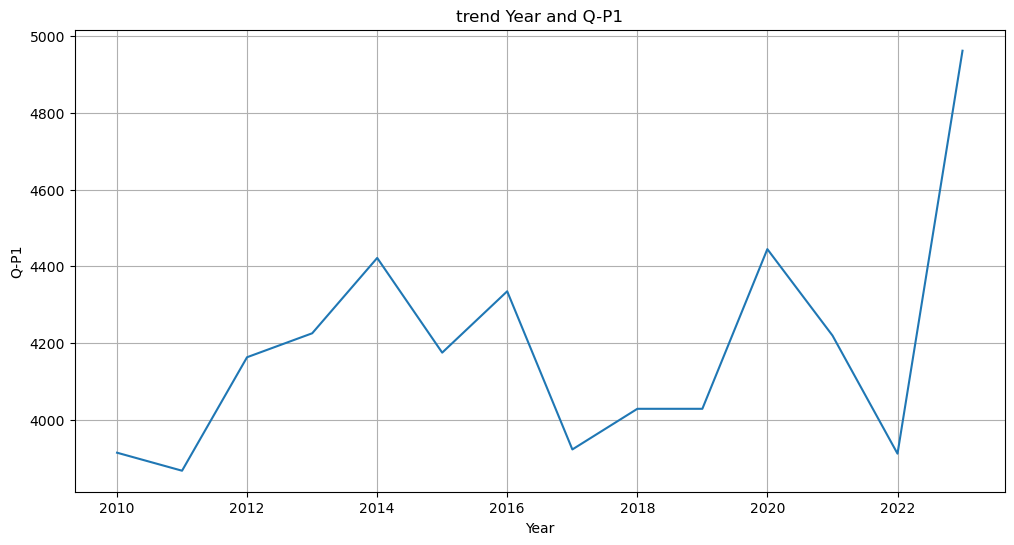

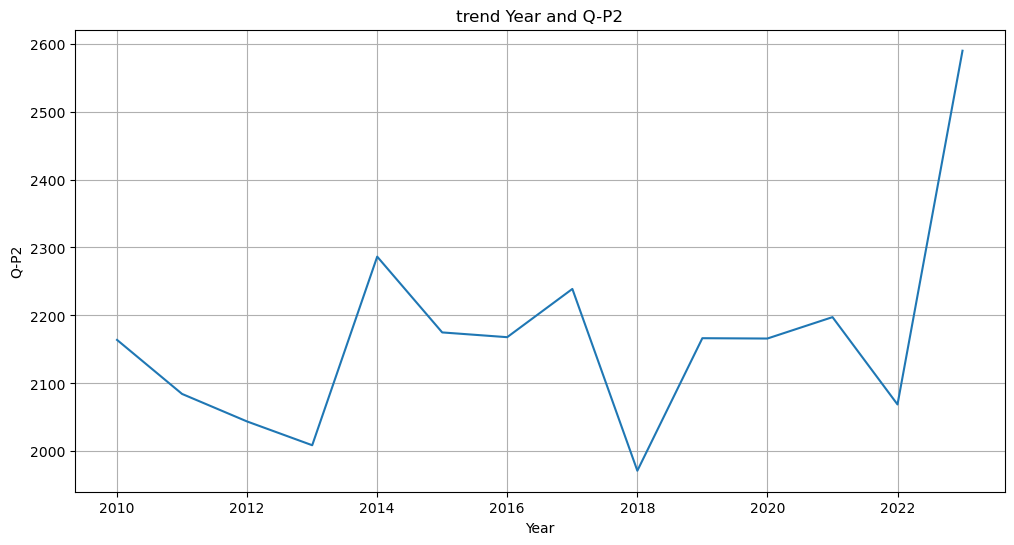

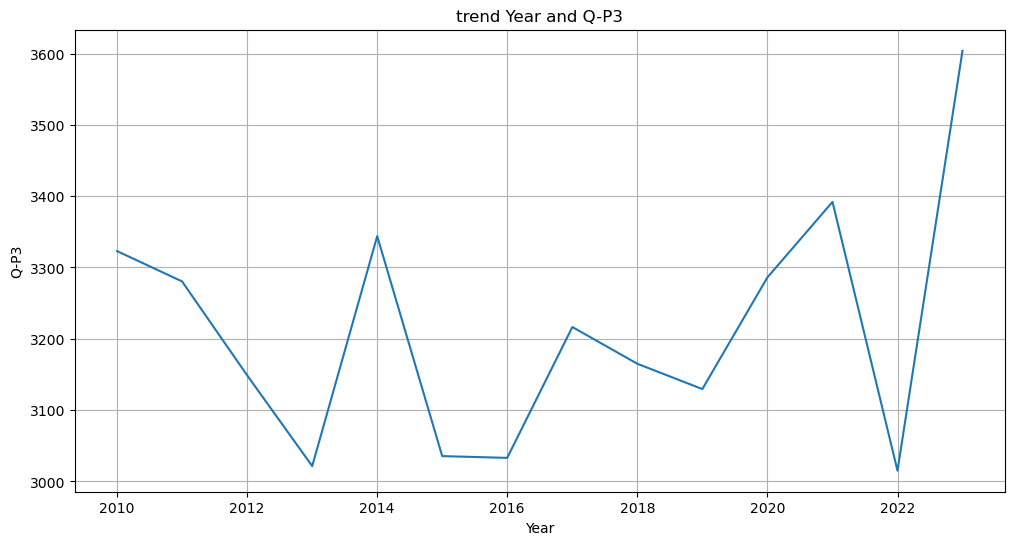

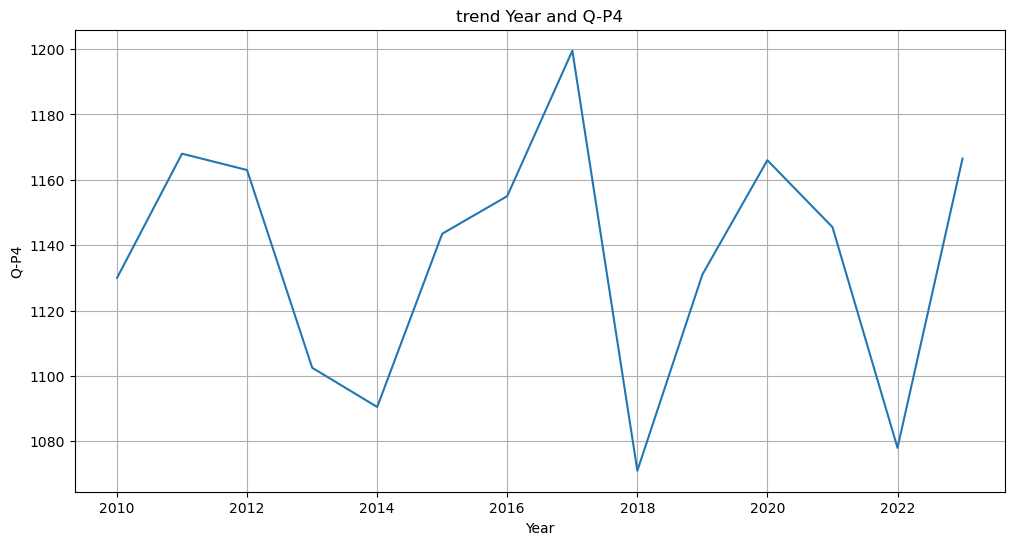

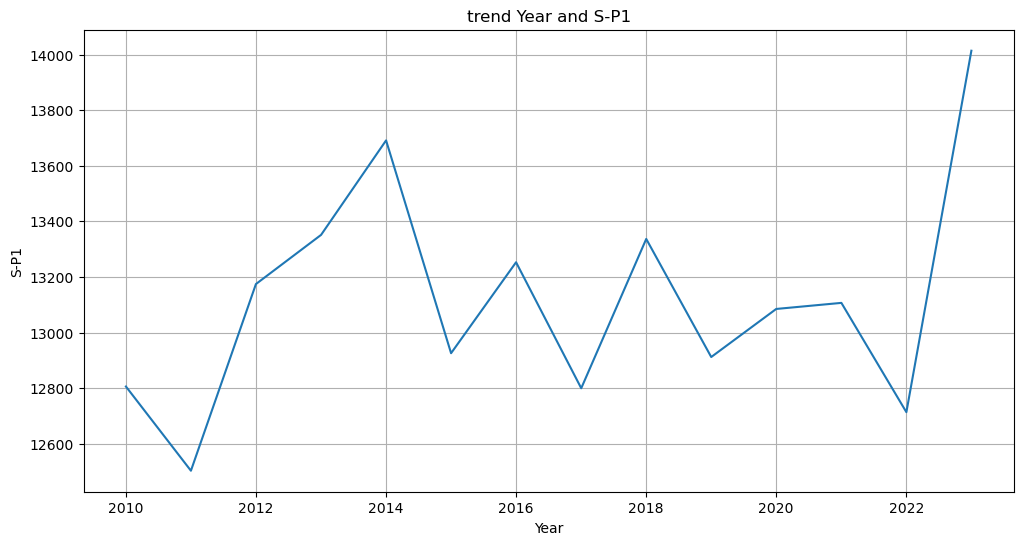

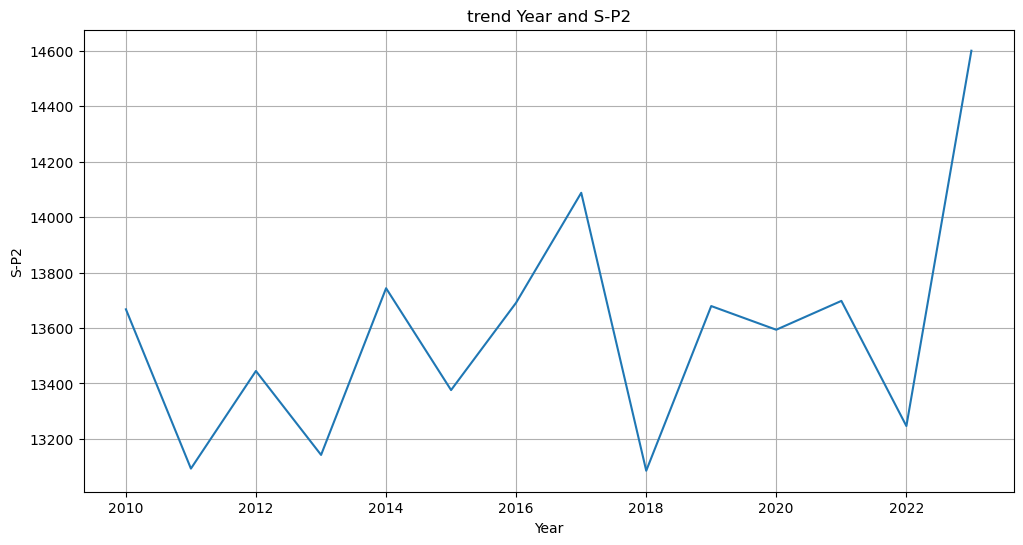

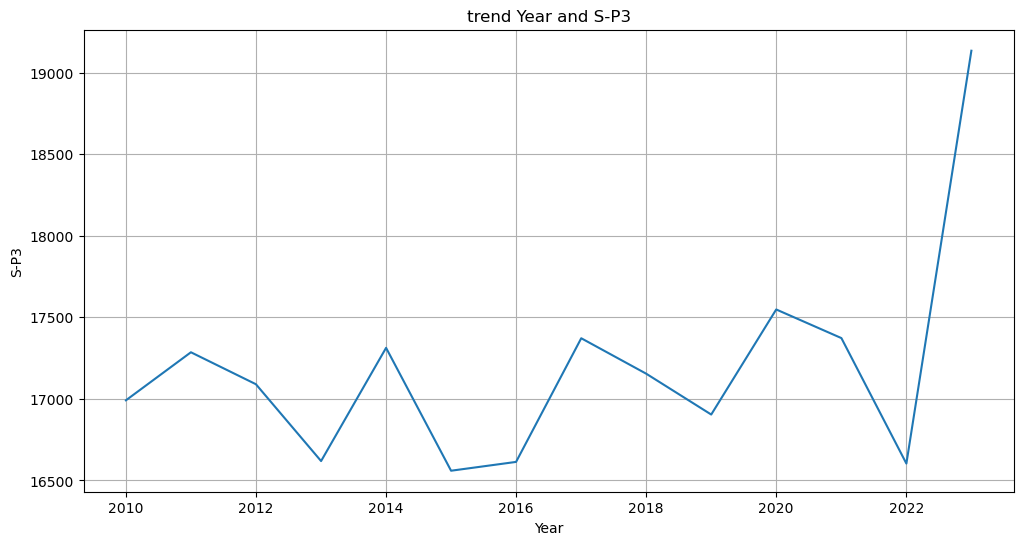

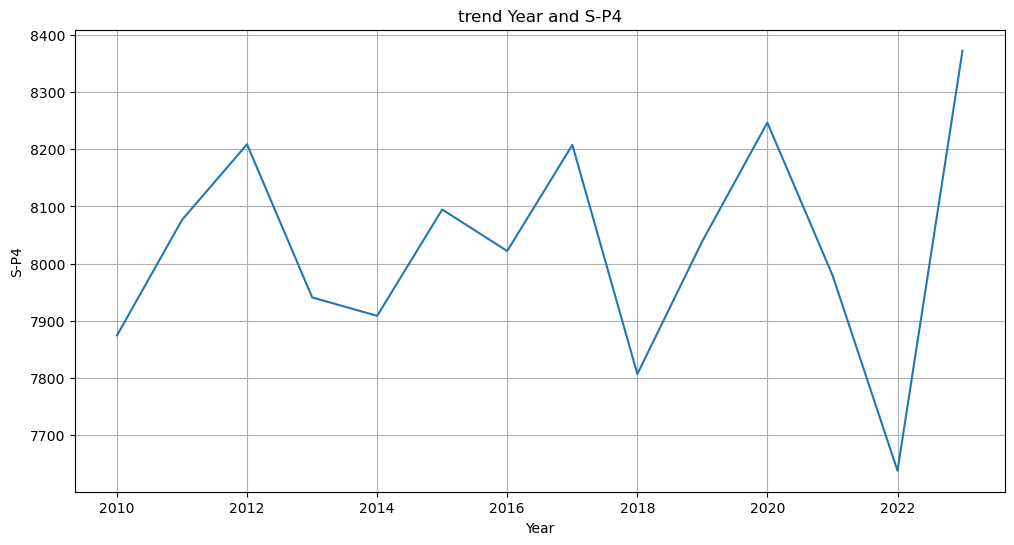

In [51]:
sample = data2
for col in data2.columns[:-1]:
    plt.figure(figsize=(12, 6))
    # moving_average = sample[col].rolling(window=100).mean()
    plt.plot(pd.to_datetime(sample['Year'], format='%Y', errors='coerce'), data2[col])
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.title('trend Year and ' + col)
    plt.grid(True)
    # Show the plot
    plt.show()

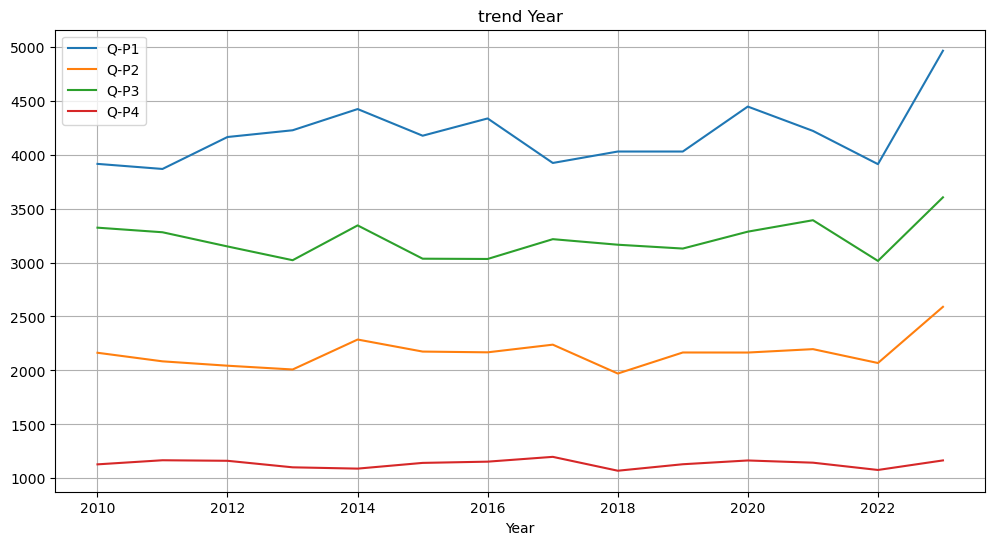

In [106]:
sample = data2
plt.figure(figsize=(12, 6))
for col in data2.columns[:-5]:
    plt.plot(pd.to_datetime(sample['Year'], format='%Y', errors='coerce'), data2[col], label=col)
plt.xlabel('Year')
plt.title('trend Year')
plt.grid(True)
plt.legend()
plt.show()

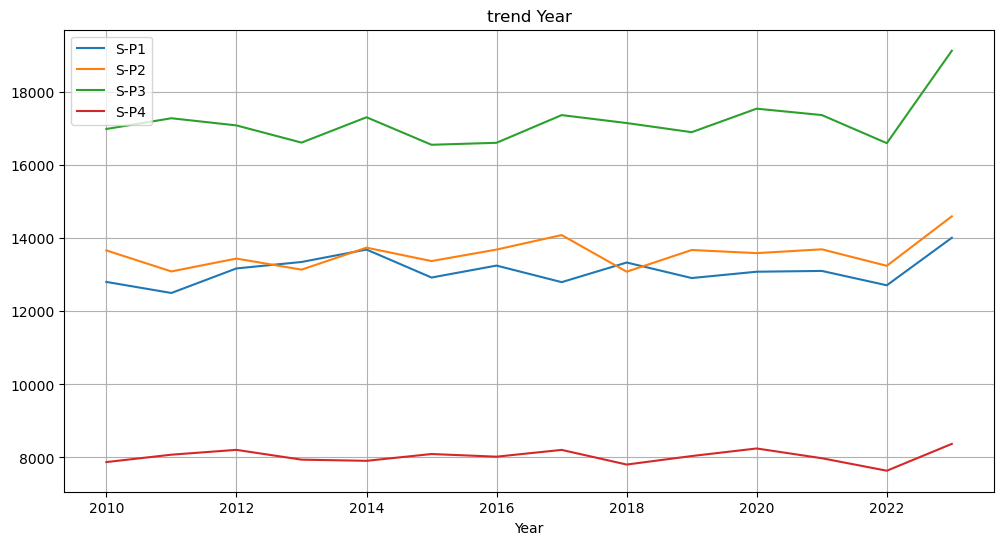

In [107]:
sample = data2
plt.figure(figsize=(12, 6))
for col in data2.columns[-5:-1]:
    plt.plot(pd.to_datetime(sample['Year'], format='%Y', errors='coerce'), data2[col], label=col)
plt.xlabel('Year')
plt.title('trend Year')
plt.grid(True)
plt.legend()
plt.show()

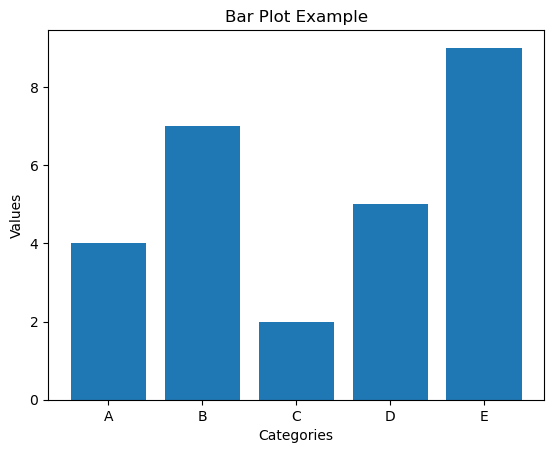

In [56]:
# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = [4, 7, 2, 5, 9]

# Create a bar plot
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot Example')

# Show the plot
plt.show()

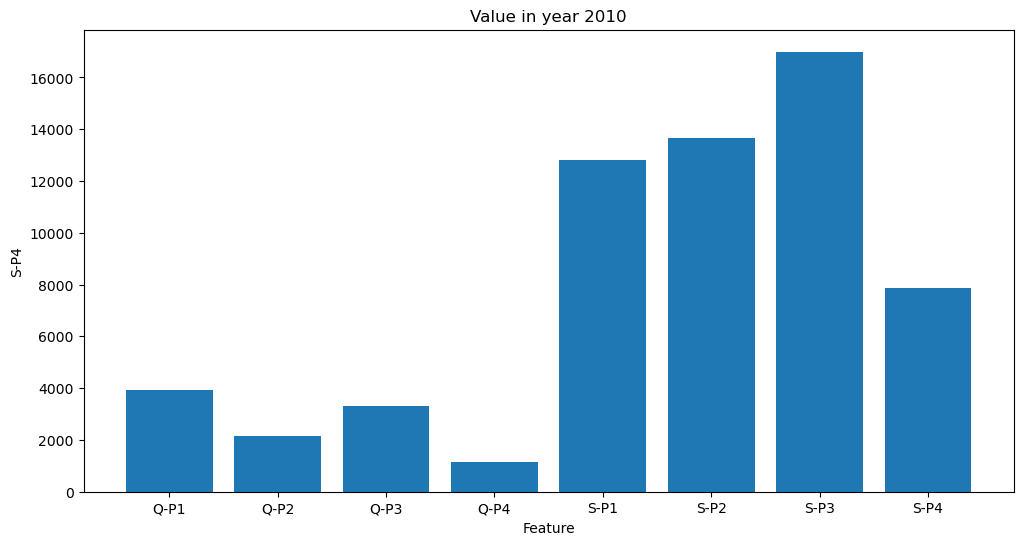

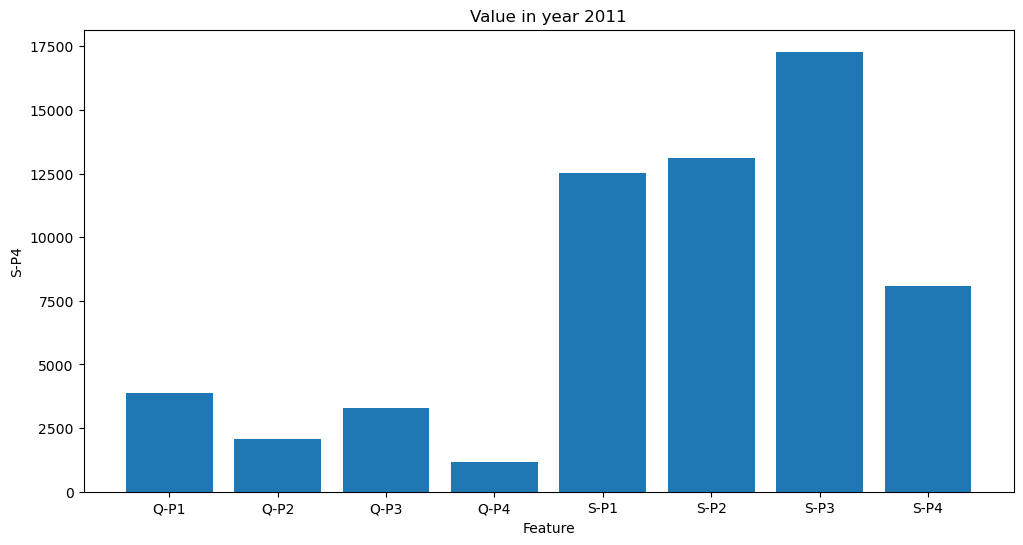

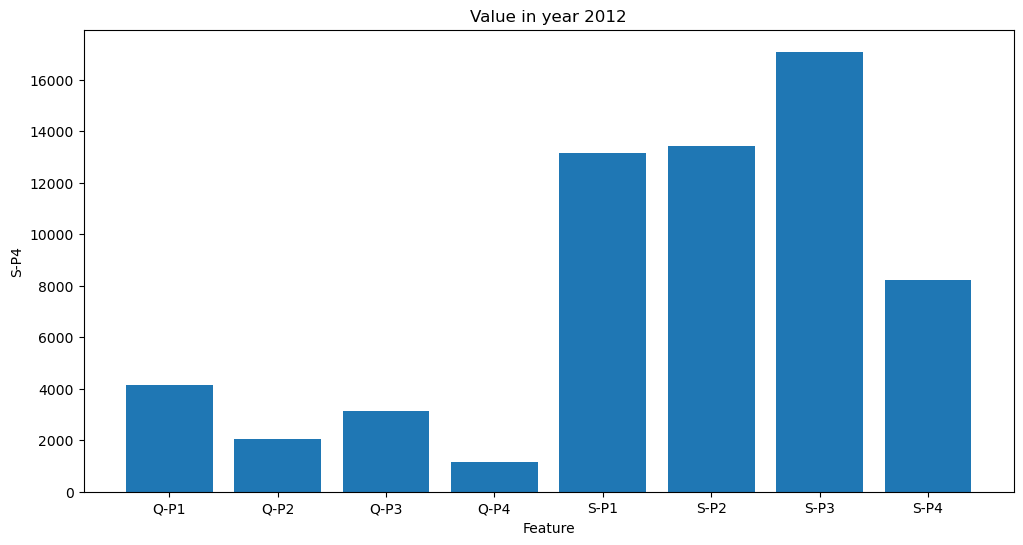

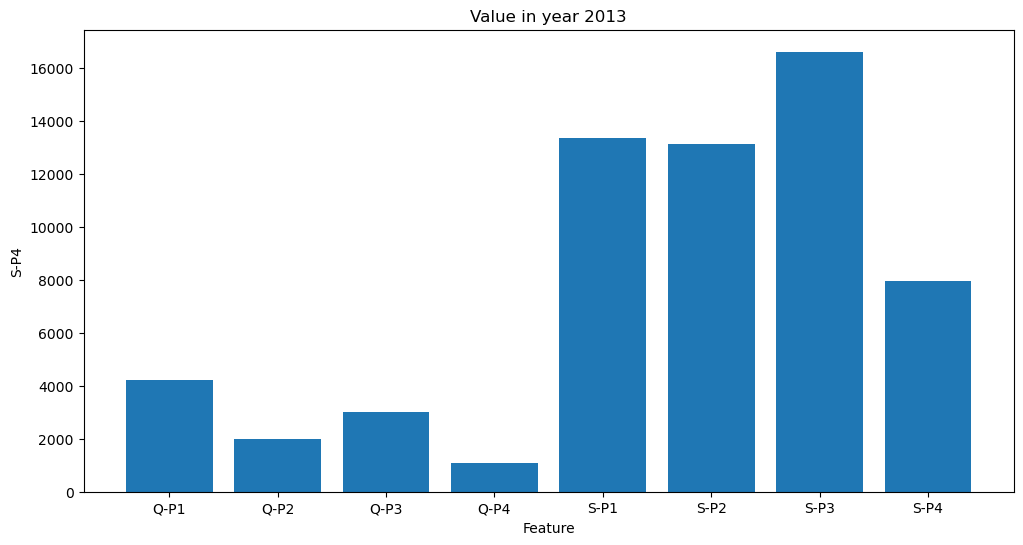

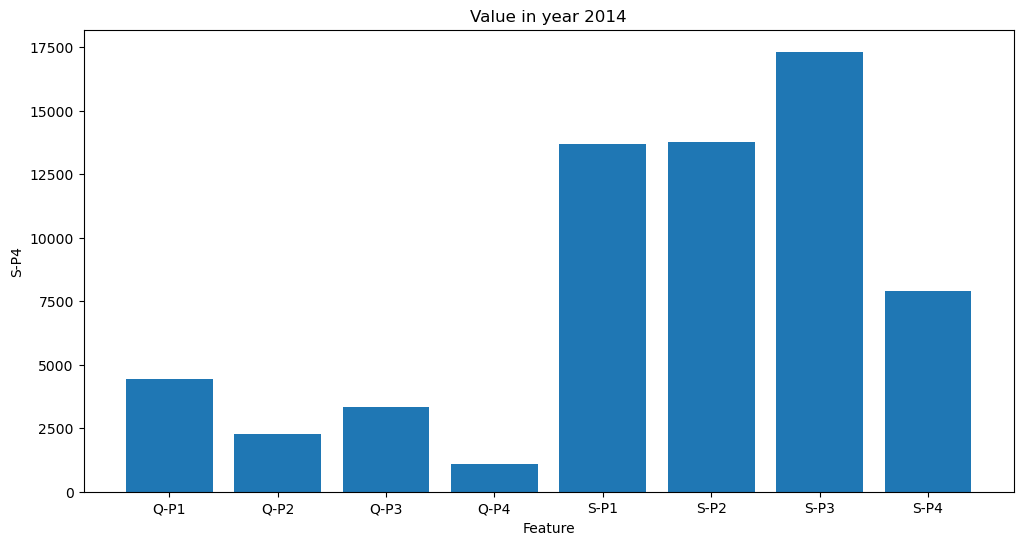

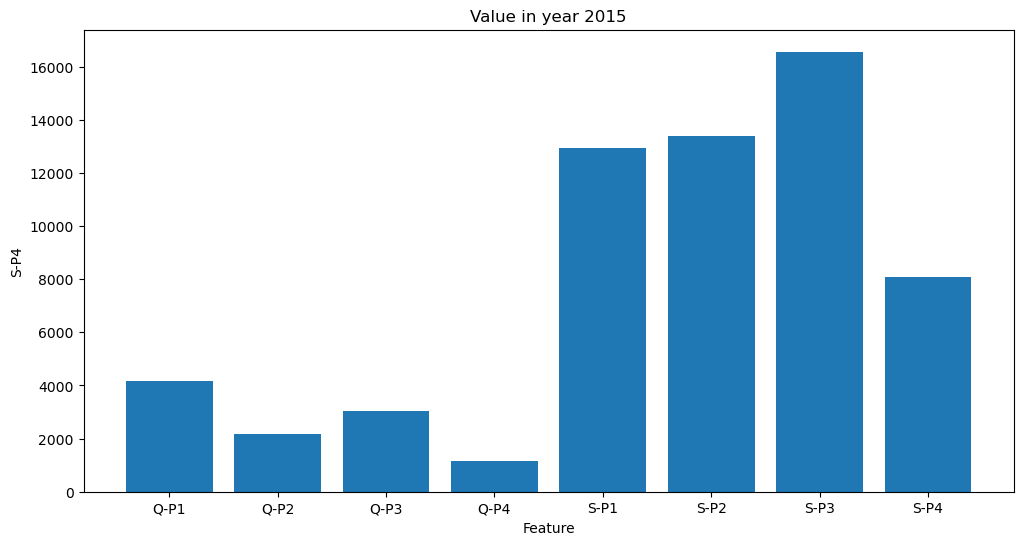

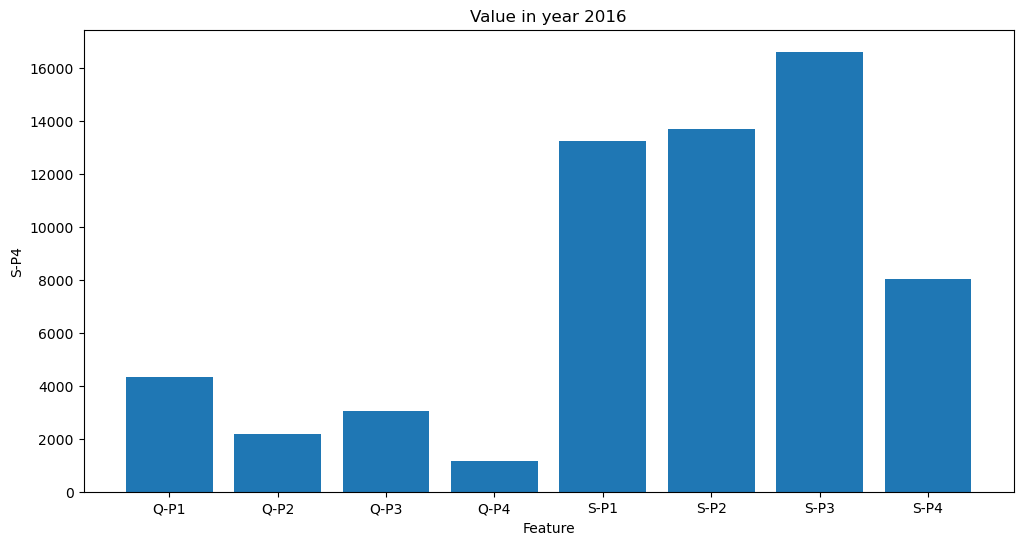

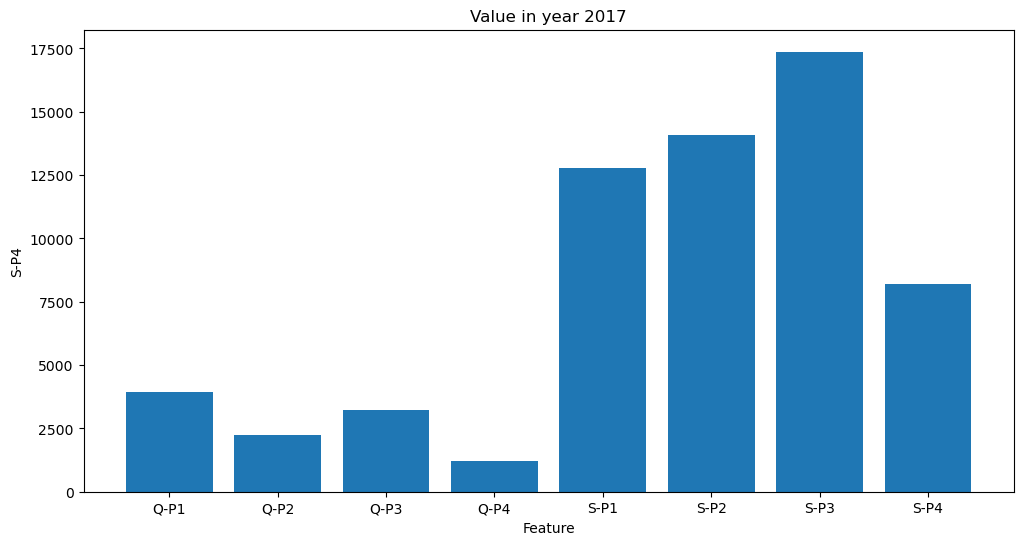

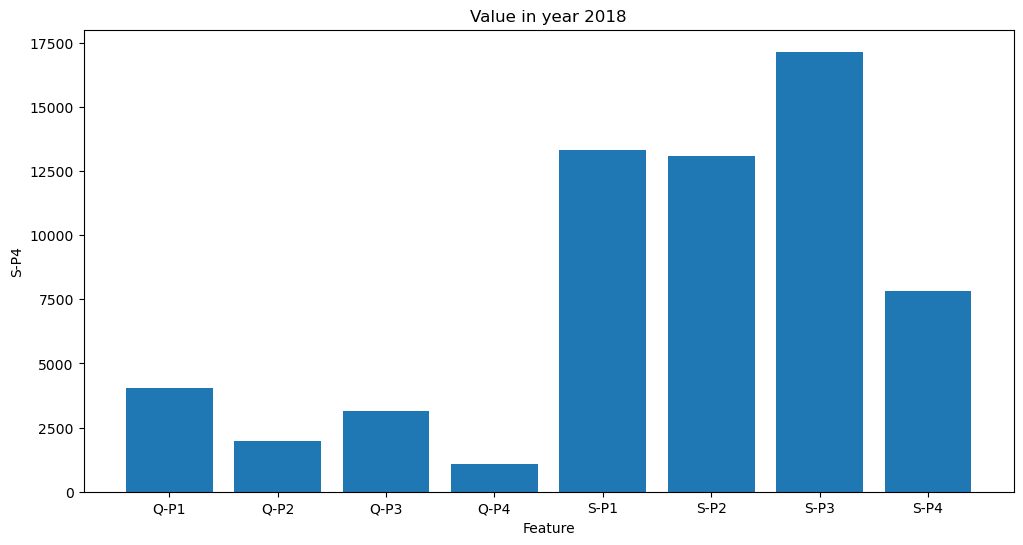

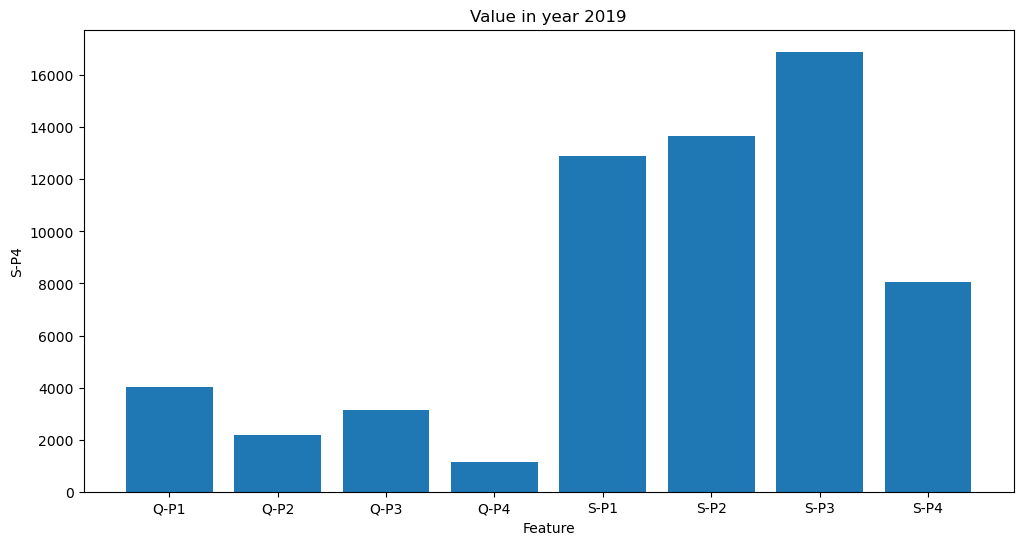

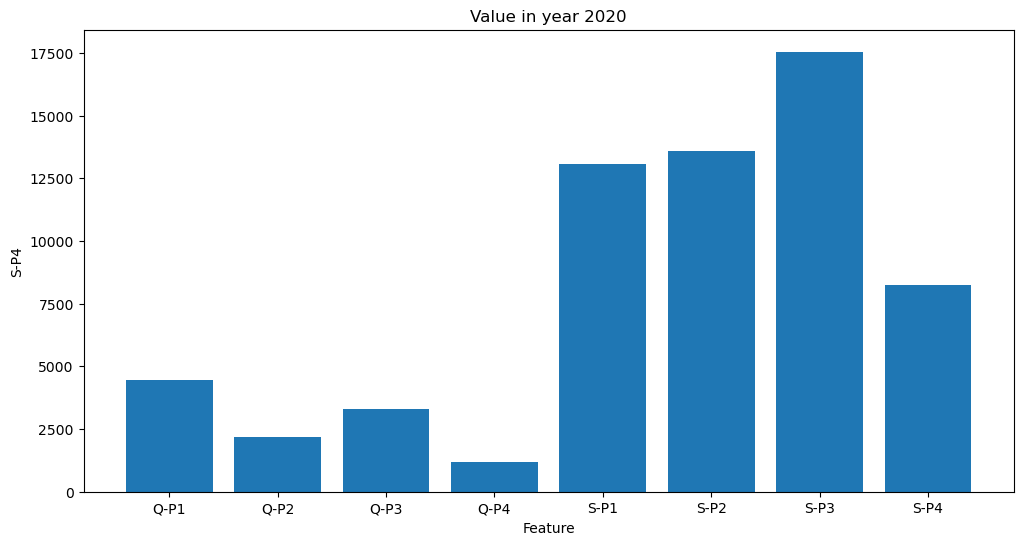

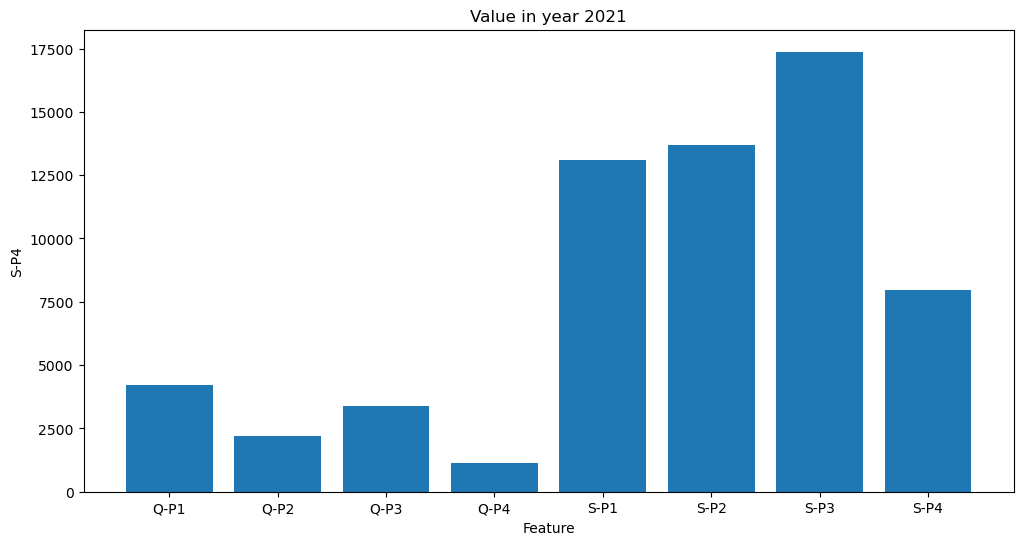

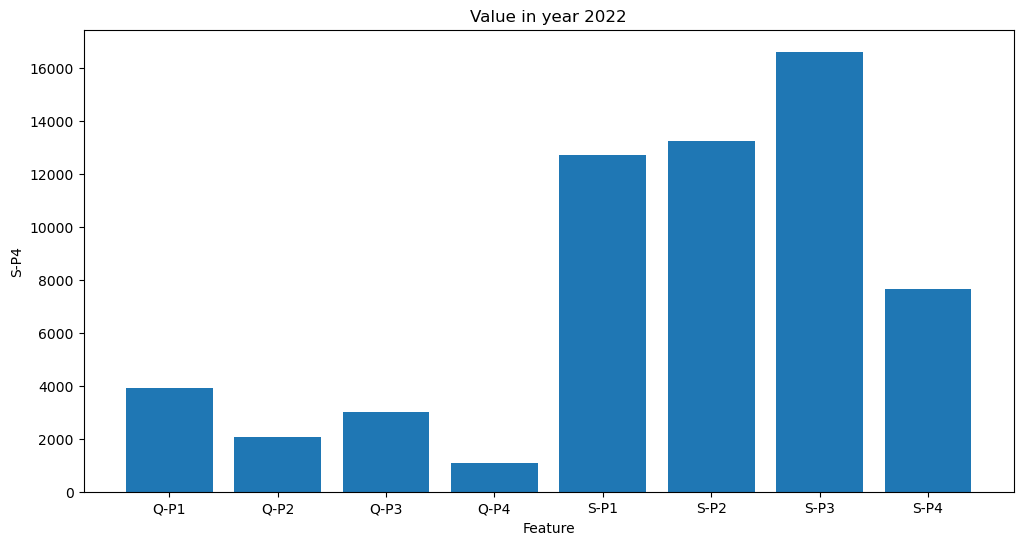

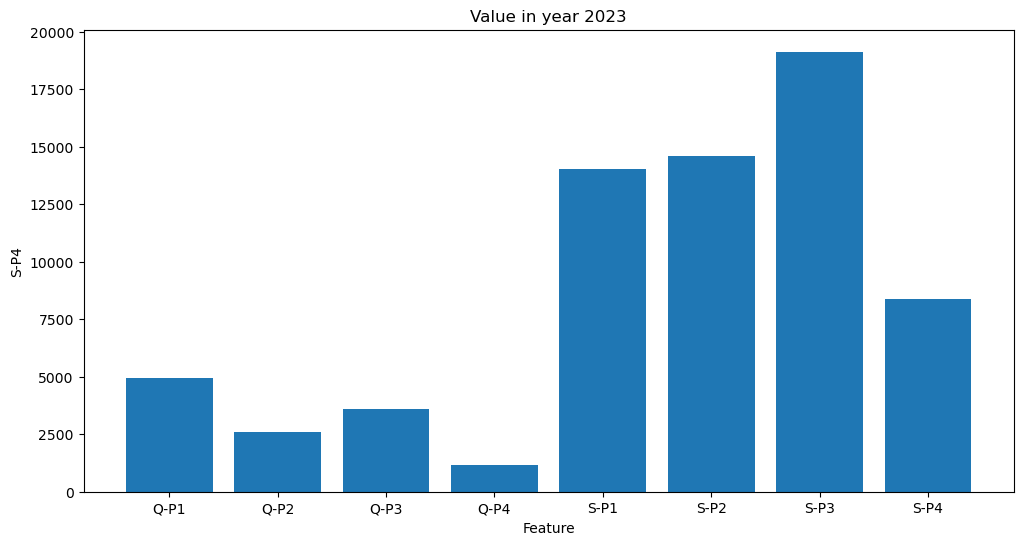

In [86]:
sample = data2
for i, row in sample.iterrows():
    # print(row[:-1])
    # break
    plt.figure(figsize=(12, 6))
    # moving_average = sample[col].rolling(window=100).mean()
    plt.bar(sample.columns[:-1], row[:-1])
    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel(col)
    plt.title('Value in year ' + str(int(row[-1])))
    # Show the plot
    plt.show()